## Imports

In [22]:
from __future__ import print_function, division
%matplotlib inline

# import used packages and modules
# import display function to display the table of the pandas dataframe
from IPython.display import display

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import csv

In [7]:
data = pd.read_csv('../data/output.csv')

In [8]:
display(data)

,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,...,opctemp,temperature,humidity,alphaVersion,urban_space,o3_ae,o3_we,no2_ae,no2_we,urban_environment
0,2015-07-02 11:09:17,55.943151,-3.188588,8,1,1,0,0,0,0,...,277.0,27.05,54.321586,2,0,10274,12834,12322,9762,2
1,2015-07-02 11:09:18,55.943150,-3.188588,10,1,1,0,0,0,0,...,277.0,27.06,54.353003,2,0,12066,12834,14114,12066,2
2,2015-07-02 11:09:19,55.943147,-3.188584,8,0,0,0,0,0,0,...,277.0,27.07,54.227315,2,0,13090,11554,12322,12066,2
3,2015-07-02 11:09:20,55.943147,-3.188584,4,2,0,0,0,0,0,...,277.0,27.07,54.101575,2,0,13090,15138,13602,13602,2
4,2015-07-02 11:09:21,55.943142,-3.188587,3,1,0,1,0,0,1,...,277.0,27.08,54.038686,2,0,11298,12834,12322,12066,2
5,2015-07-02 11:09:23,55.943140,-3.188583,7,0,0,0,0,0,0,...,277.0,27.11,53.912870,2,0,14370,16418,12834,14882,2
6,2015-07-02 11:09:24,55.943137,-3.188583,5,0,0,0,0,1,0,...,277.0,27.11,53.912870,2,0,14114,12834,12322,14114,2
7,2015-07-02 11:09:25,55.943135,-3.188583,7,1,0,0,0,0,0,...,277.0,27.14,53.881408,2,0,9506,15906,13346,13346,2
8,2015-07-02 11:09:26,55.943134,-3.188576,12,2,0,0,0,0,0,...,277.0,27.14,53.849943,2,0,12322,15906,12322,13858,2
9,2015-07-02 11:09:27,55.943134,-3.188576,7,0,0,0,0,0,2,...,277.0,27.16,53.818475,2,0,13346,14882,12578,13346,2


In [9]:
bins = ['bin{}'.format(i) for i in xrange(0,16)]
pm_vals = ['pm1', 'pm2_5', 'pm10']

In [10]:
x_bins = data[bins]
x_pm = data[pm_vals]
x_bins_pm = data[bins+pm_vals]
y = data['urban_environment']

In [11]:
def get_training_accuracy_with_kfolds(estimator, x_tr, y_tr, kf):

    score_array = np.empty(kf.n_folds)
    
    for (idx, (train_feature, test_feature)) in enumerate(kf):
        estimator.fit(x_tr.iloc[train_feature], y_tr.iloc[train_feature])
        score_array[idx] = estimator.score(x_tr.iloc[test_feature], y_tr.iloc[test_feature])
    
    return np.mean(score_array)

In [12]:
kf_3 = KFold(len(x_pm), n_folds=3, shuffle=True, random_state=0)

for (idx, (train_feature, test_feature)) in enumerate(kf_3):
    print("Number of test samples in fold {}: {}".format(idx, len(test_feature)))

Number of test samples in fold 0: 25345
Number of test samples in fold 1: 25345
Number of test samples in fold 2: 25344


Most optimal number of neighbours: 14


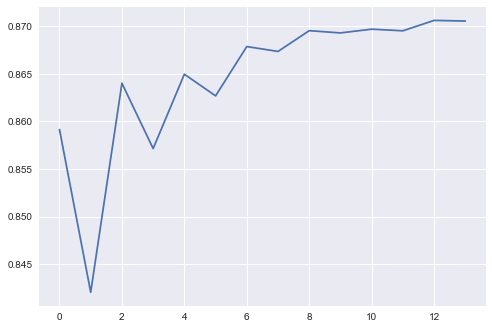

In [58]:
results = []
for neighbours in range(2,16):
    knn = KNeighborsClassifier(n_neighbors=neighbours)
    results.append(get_training_accuracy_with_kfolds(knn, x_pm, y, kf_3))
plt.plot(results)
print("Most optimal number of neighbours: {}".format(results.index(max(results))+2))

In [59]:
print("ACCURACY BASED ON PM VALS: {}".format(get_training_accuracy_with_kfolds(knn, x_pm, y, kf_3)))

ACCURACY BASED ON PM VALS: 0.870610513881


In [60]:
print("ACCURACY BASED ON BIN VALS: {}".format(get_training_accuracy_with_kfolds(knn, x_bins, y, kf_3)))

ACCURACY BASED ON BIN VALS: 0.867138428658


In [61]:
print("ACCURACY BASED ON PM AND BIN VALS: {}".format(get_training_accuracy_with_kfolds(knn, x_bins_pm, y, kf_3)))

ACCURACY BASED ON PM AND BIN VALS: 0.867611894824


In [20]:
kmeans.fit(x_bins, y)
s = kmeans.predict(x_bins)

cnt = 0
for i in range(0, len(s)):
    if s[i] == y[i]:
        cnt+=1
print("accuracy on kmeans: {}".format(cnt/len(s)))

accuracy on kmeans: 0.870400084173


In [32]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_pm, y)
predicted_results = kmeans.predict(x_pm)

cnt = 0
for i in range(0, len(predicted_results)):
    if predicted_results[i] == y[i]:
        cnt+=1
print("accuracy on kmeans: {}".format(cnt/len(predicted_results)))

accuracy on kmeans: 0.870557908304


In [23]:
rows = []
with open('../data/output.csv', 'rt') as csvfile:
    reader = csv.DictReader(csvfile, delimiter=',', quotechar='\"')
    cnt = 0
    for row in reader:
        row['predicted_environment'] = predicted_results[cnt]
        rows.append(row)
        cnt += 1

with open('../data/predicted_outputs.csv', 'wt') as csvfile:
    writer = csv.DictWriter(csvfile, delimiter=',', quotechar='\"', fieldnames=list(rows[0].keys()))
    writer.writeheader()
    writer.writerows(rows)


In [35]:
knn = KNeighborsClassifier(n_neighbors=14)
knn.fit(x_pm, y)
predicted_results = knn.predict(x_pm)

cnt = 0
for i in range(0, len(predicted_results))

set([0, 1])
